# Analyzing the Traffic on the I-94 Interstate Highway

Interstate 94 (I-94) is an east–west Interstate Highway connecting the Great Lakes and northern Great Plains regions of the United States (https://en.wikipedia.org/wiki/Interstate_94). This project aims to analyze indicators of heavy traffic on I-94 Highway.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
traffic_vol = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

Below we do the initial inspectations on data:

In [3]:
traffic_vol.info()
traffic_vol.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


It looks like dataset contains information of if the day was holiday or not and weather condition of the day.

John Hague states that weather condititons and traffic of volume on this dataset were recorded at a station located approximately midway between start and end of the highway and it only recorded the westbound traffic (https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume). So it is better to avoid generalizing the result for entire highway.

Also we see that dataset contains nearly 48.000 rows and each row is seperated hourly.

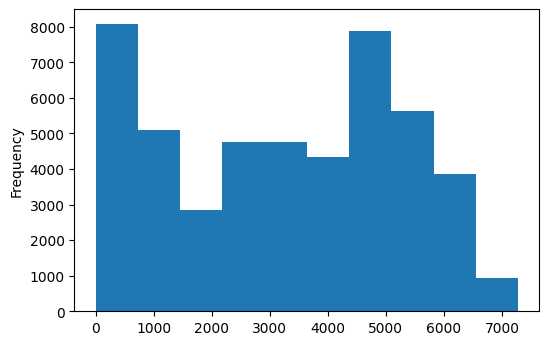

In [4]:
traffic_vol["traffic_volume"].plot.hist()

In [5]:
traffic_vol["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

By looking at the initial statistics it can be said that traffic is generally below 5000 while it ranges between 0 to 7280.

In [6]:
traffic_vol["date_time"] = pd.to_datetime(traffic_vol["date_time"])

In [7]:
datetimes = traffic_vol["date_time"]

In [8]:
datetimes.dt.hour.head(24)

0      9
1     10
2     11
3     12
4     13
5     14
6     15
7     16
8     17
9     18
10    19
11    20
12    21
13    22
14    23
15     0
16     1
17     2
18     3
19     4
20     5
21     6
22     8
23     9
Name: date_time, dtype: int64

In [66]:
daytime = traffic_vol[(datetimes.dt.hour >= 7)&( datetimes.dt.hour <19)]
nighttime = traffic_vol[(datetimes.dt.hour >=19) | (datetimes.dt.hour < 7)]

(0.0, 8000.0)

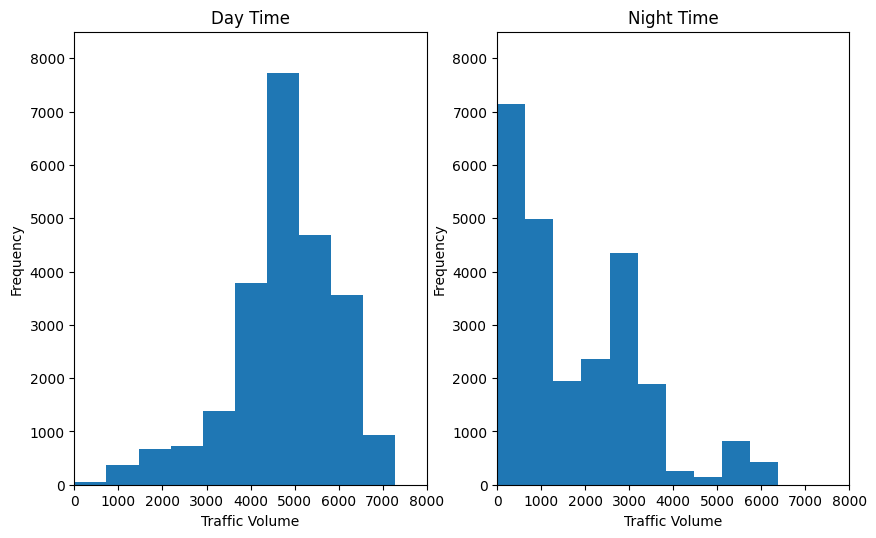

In [67]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.hist(daytime["traffic_volume"])
plt.title("Day Time")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.ylim([0,8500])
plt.xlim([0,8000])

plt.subplot(1,2,2)
plt.hist(nighttime["traffic_volume"])
plt.title("Night Time")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.ylim([0,8500])
plt.xlim([0,8000])

By looking at the graphs at above it can be concluded that there is no high traffic volume at nighttime. So we can ignore the data which is recorded at the nighttime.

In [68]:
daytime["month"] = daytime["date_time"].dt.month
by_month = daytime.groupby("month").mean()

<ipython-input-68-f9e2a425165e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [69]:
by_month

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
month,,,,,
1,265.483409,0.015080,0.000631,58.554108,4495.613727
2,266.663789,0.004019,0.000000,51.550459,4711.198394
3,273.619940,0.015839,0.000000,56.827811,4889.409560
4,279.661071,0.105343,0.000000,59.221525,4906.894305
5,289.282668,0.130863,0.000000,56.548825,4911.121609
6,294.576068,0.271121,0.000000,48.612374,4898.019566
7,296.785052,4.412258,0.000000,42.176619,4595.035744
8,295.119191,0.228113,0.000000,42.556892,4928.302035
9,292.520287,0.289807,0.000000,45.184112,4870.783145


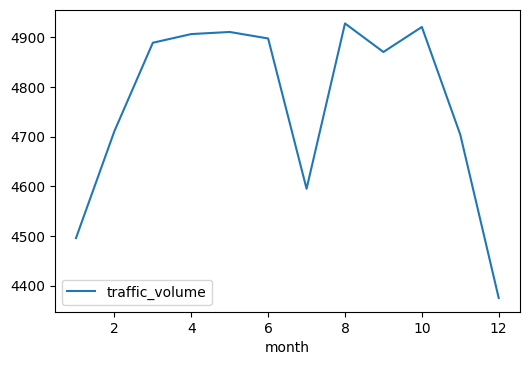

In [70]:
by_month.plot.line(y="traffic_volume")

Graph above indicates that there is more heavy traffic in warm months. One exceptation is July which is the 7th month. Lets analyze further.

In [71]:
daytime["year"] = daytime["date_time"].dt.year
july = daytime[daytime["month"] == 7]

<ipython-input-71-f44f0895b84e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



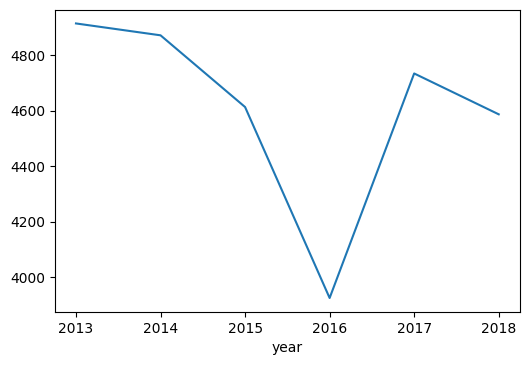

In [72]:
july.groupby("year").mean()["traffic_volume"].plot.line()

Above we see that there is a significant drop in the traffic volume. It doesn't look normal. 
It appears to be there was a road construction at July 2016.

<ipython-input-73-f1579eab711c>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



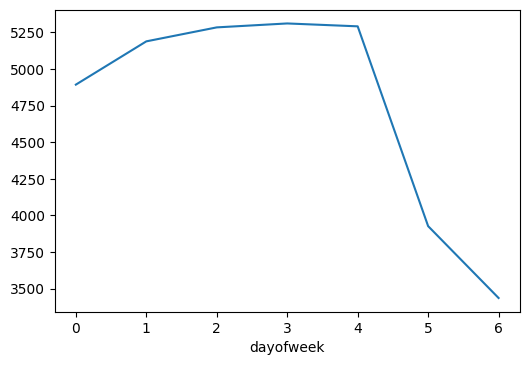

In [73]:
daytime["dayofweek"] = daytime["date_time"].dt.dayofweek
daytime.groupby("dayofweek").mean()["traffic_volume"].plot.line()

It is clear that traffic is more heavier at workday than the weekends.

In [74]:
daytime["hour"] = daytime["date_time"].dt.hour
workdays = daytime.copy()[daytime["dayofweek"]<=4] #4 is Friday
weekends = daytime.copy()[daytime["dayofweek"]>=5] #5 is Saturday

<ipython-input-74-b2cf549e0ec3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [75]:
by_hour_workdays = workdays.groupby("hour").mean()
by_hour_weekends = weekends.groupby("hour").mean()
print(by_hour_workdays)

            temp   rain_1h   snow_1h  clouds_all  traffic_volume     month  \
hour                                                                         
7     278.662639  0.145105  0.000068   50.538983     6030.413559  6.363390   
8     278.938443  0.144614  0.000135   53.666441     5503.497970  6.567659   
9     279.628421  0.156829  0.000139   53.619709     4895.269257  6.484386   
10    280.664650  0.113984  0.000033   54.781417     4378.419118  6.481283   
11    281.850231  0.151976  0.000000   52.808876     4633.419470  6.448819   
12    282.832763  0.090271  0.001543   53.855714     4855.382143  6.569286   
13    283.292447  0.092433  0.000370   53.325444     4859.180473  6.465237   
14    284.091787  0.102991  0.000746   55.326531     5152.995778  6.588318   
15    284.450605  0.090036  0.000274   54.168467     5592.897768  6.541397   
16    284.399011  0.118180  0.000632   54.444132     6189.473647  6.580464   
17    284.263033  7.299358  0.000000   55.204960     5784.827133

(6.0, 20.0)

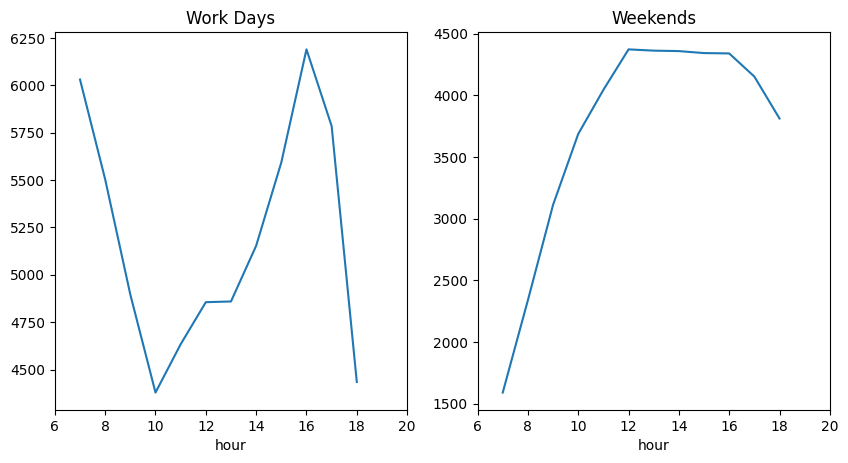

In [79]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
by_hour_workdays["traffic_volume"].plot.line()
plt.title("Work Days")
plt.xlim([6,20])
plt.subplot(1,2,2)
by_hour_weekends["traffic_volume"].plot.line()
plt.title("Weekends")
plt.xlim([6,20])

It appears to be 7am and 4pm are rush hours for workdays while vehicles usually pass around 12 to 16

To summarize we can say that traffic is usually heavier during the warm months compared to the cold months.
Also traffic is heavier on the business days compared to the weekends. It is also clear that rush hours on business days are around 7 and 16.

In [80]:
daytime.corr()["traffic_volume"]

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

It looks like we can't find a good insight from correlations between numerical weather conditions and traffic volume. But we can use the weather_main and weather_description columns.

In [81]:
by_weather_main = daytime.groupby("weather_main").mean()
by_weather_description = daytime.groupby("weather_description").mean()

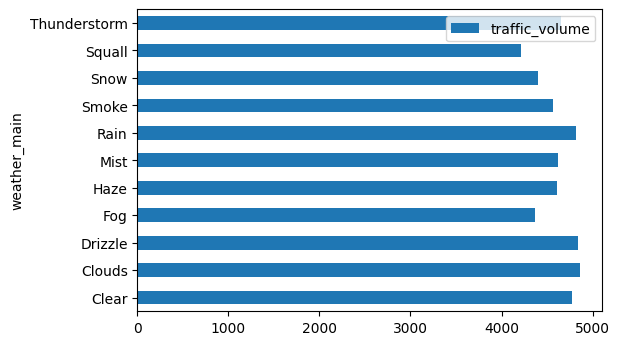

In [86]:
by_weather_main.plot.barh(y="traffic_volume")

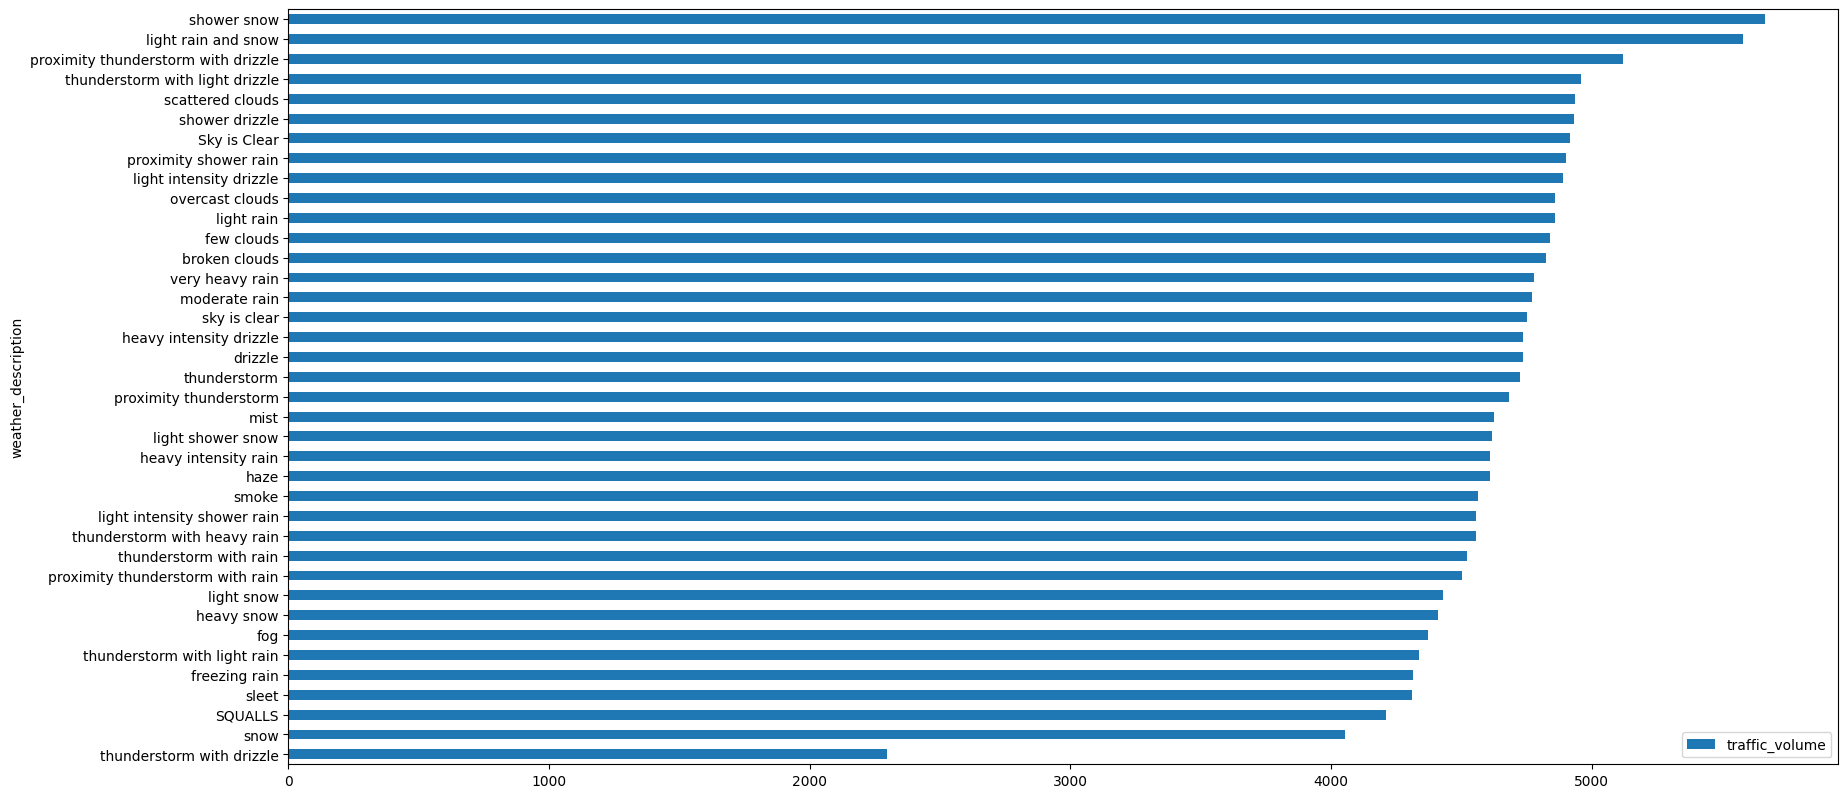

In [90]:
by_weather_description.sort_values(by="traffic_volume").plot.barh(y="traffic_volume",figsize=(20,10))